In [107]:
from pathlib import Path 

import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 

### Folders 
offolder = 'c:/Users/hvrl/Documents/data/KU/of300/framestep0025'

In [108]:
of_folder = Path(offolder)
# Get list of all optical frames path 
of_list = [f for f in of_folder.iterdir() if f.is_file() and '.npy' in str(f)]

videos_ids = [
    "0838_0917", 
    "2108_2112", 
    "5909_5915", 
    "green0410_0452"
]

# List of values 
all_values = [[] for i in range(len(videos_ids))]

for i, id in enumerate(videos_ids): 
    for flowfile in of_list: 
        if id in str(flowfile.stem): 
            flow = np.load(flowfile)
            norms = np.sqrt(flow[:,:,0]**2+flow[:,:,1]**2)
            all_values[i] += list(norms.flatten().astype(int))


In [109]:
counts_list = [np.unique(np.array(values_list), return_counts=True) for values_list in all_values]
print("DEBUG PRINT: STOP 2")

DEBUG PRINT: STOP 2


In [110]:
# print(counts_list)
# for i in range(len(counts_list)): 
#     print(counts_list[i][0], len(counts_list[i][1]))

nbOfBins = [len(counts_list[i][0]) for i in range(len(counts_list))]

print(nbOfBins)

[120, 178, 74, 92]


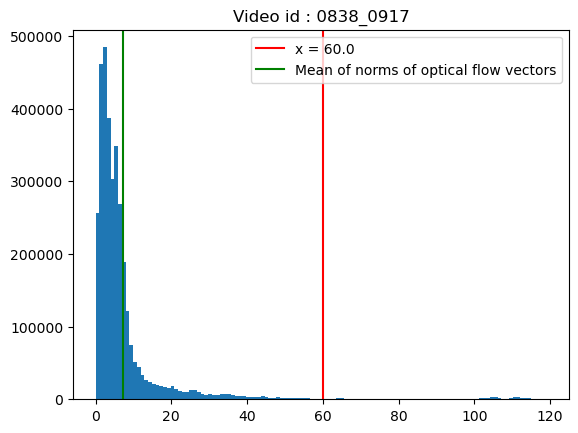

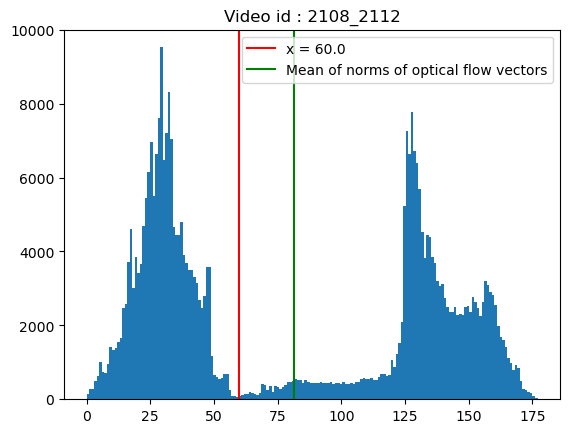

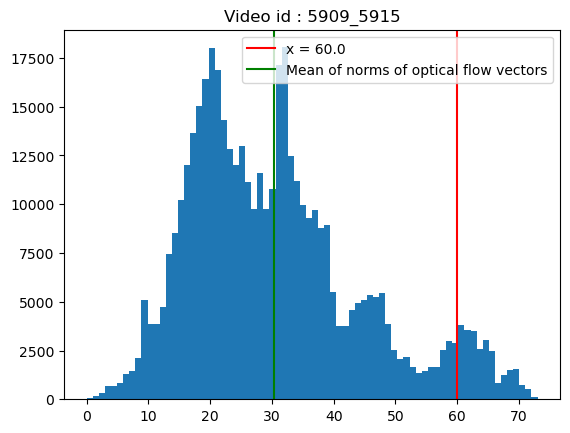

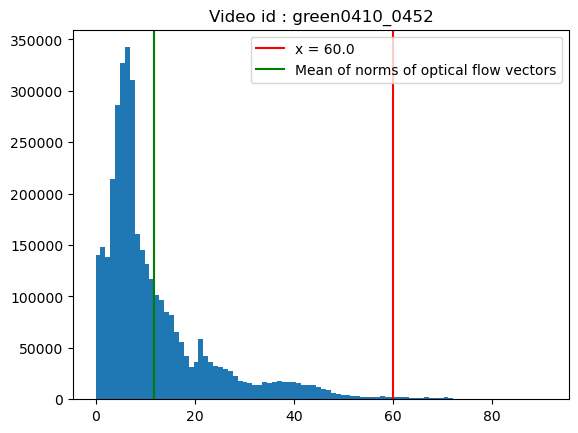

In [111]:
for i in range(len(counts_list)): 
    plt.hist(counts_list[i][0], bins=nbOfBins[i], weights=counts_list[i][1])
    plt.axvline(x = 0.2*300, color = 'r', label = f'x = {0.2*300}')
    plt.axvline(x = np.mean(all_values[i]), color = 'g', label = 'Mean of norms of optical flow vectors')
    plt.legend(loc="best")
    plt.title(f'Video id : {videos_ids[i]}')
    plt.show()

In [112]:
trunc_counts_list = [[] for i in range(len(counts_list))]
for i in range(len(counts_list)): 
    trunc_counts_list[i] = np.where(counts_list[i][0] > 0.2*300), counts_list[i][1][np.where(counts_list[i][0] > 0.2*300)]

print(trunc_counts_list[0])

((array([ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119], dtype=int64),), array([ 644,  616,  757, 1497, 1223,  871,  503,  357,  347,  324,  239,
        177,  114,  136,   65,  146,  374,  206,  188,  185,  188,  126,
        136,   34,  101,   12,    8,    7,    7,    4,    6,   13,    9,
          7,   23,   18,  141,  267,  136,  472,  728, 1204, 1880, 2417,
       2449, 2734, 2264, 1014, 1023, 1854, 2947, 2793, 2084, 1481, 1274,
        258,  106,   33,    9], dtype=int64))


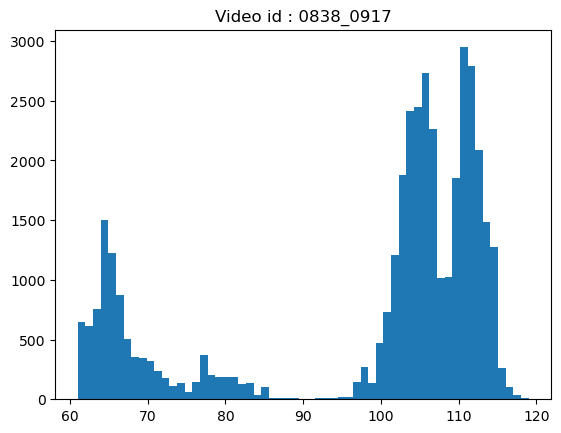

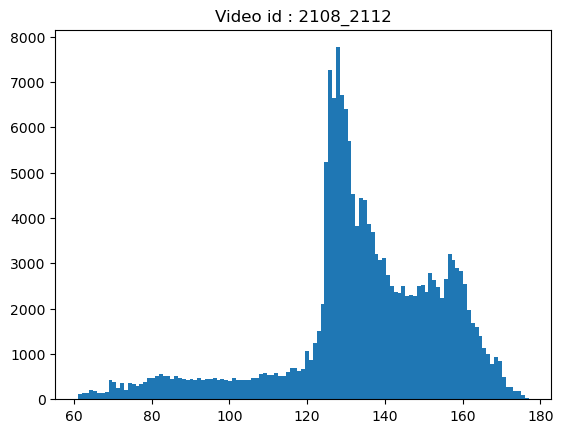

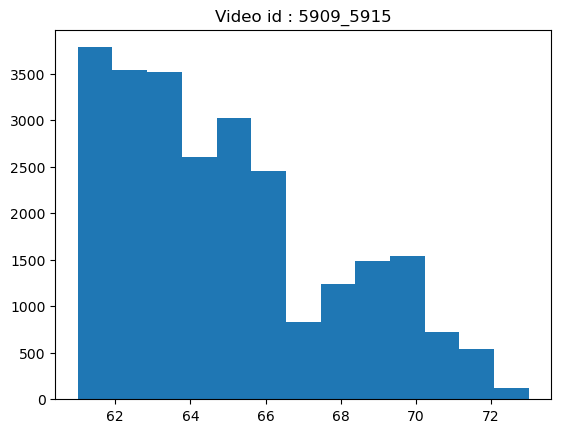

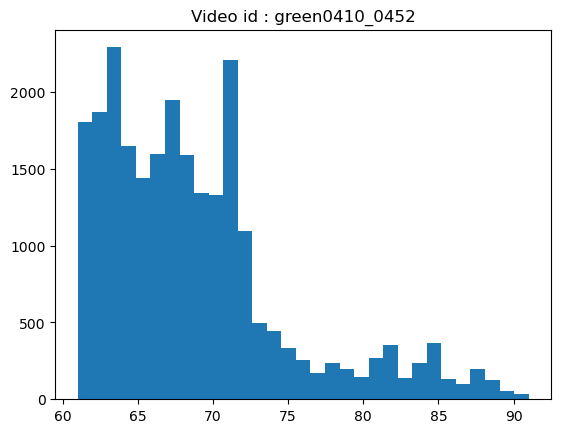

In [113]:
for i in range(len(trunc_counts_list)): 
    if len(trunc_counts_list[i][1]) > 0: 
        plt.hist(trunc_counts_list[i][0], bins=len(trunc_counts_list[i][1]), weights=trunc_counts_list[i][1])
        plt.title(f'Video id : {videos_ids[i]}')
        plt.show()